In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

print('train df shape:', train_df.shape)
print('train df cols:', train_df.columns.tolist())
print('head of train df:')
print(train_df.head())
print('target value counts:', train_df['Target'].value_counts())
# print(train_df['Target'].value_counts())
print('percent of each class:', train_df['Target'].value_counts(normalize=True) * 100)
# print(train_df['Target'].value_counts(normalize=True) * 100)

# split
# X all except the target
# y 'Target'
X = train_df.drop('Target', axis=1)
y = train_df['Target']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# stratified train-val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

print(f'new X_train shape: {X_train.shape}')
print(f'new X_val shape: {X_val.shape}')
print(f'y_train value counts:\n{y_train.value_counts()}')
print(f'y_val value counts:\n{y_val.value_counts()}')

# features
print('numerical features:', X_train.select_dtypes(include=['int64', 'float64']).columns.tolist())

train df shape: (259832, 8)
train df cols: ['User_ID', 'month', 'year', 'CompPart', 'Comment', 'Sub', 'Disc', 'Target']
head of train df:
       User_ID  month  year  CompPart  Comment  Sub  Disc  Target
0  ID_XI7BAR4Y      8     3         0        0    0     0       0
1  ID_XI7BAR4Y      8     2         0        0    0     0       0
2  ID_XI7BAR4Y      9     2         0        0    0     0       0
3  ID_XI7BAR4Y      9     3         0        0    0     0       0
4  ID_XI7BAR4Y     10     3         0        0    0     0       0
target value counts: Target
0    223526
1     36306
Name: count, dtype: int64
percent of each class: Target
0    86.027125
1    13.972875
Name: proportion, dtype: float64
X shape: (259832, 7)
y shape: (259832,)
new X_train shape: (207865, 7)
new X_val shape: (51967, 7)
y_train value counts:
Target
0    178820
1     29045
Name: count, dtype: int64
y_val value counts:
Target
0    44706
1     7261
Name: count, dtype: int64
numerical features: ['month', 'year', 'Com

numerical features: 6
categorical features: 1


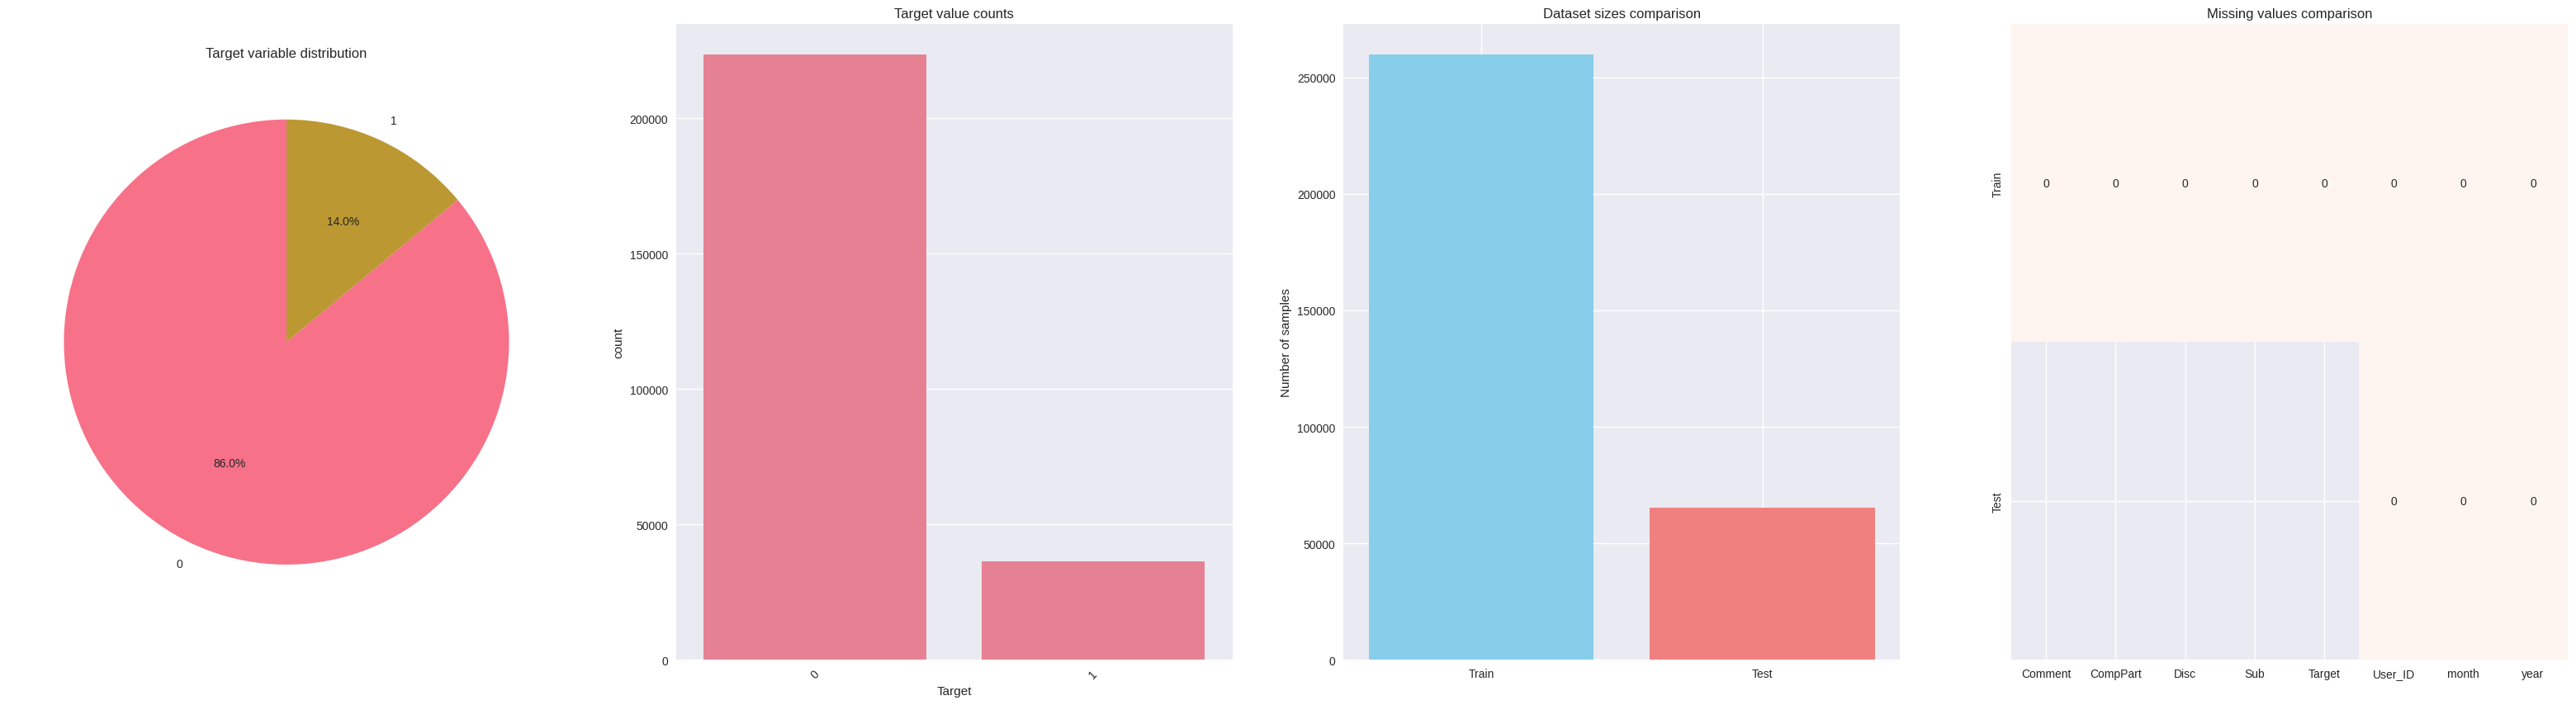

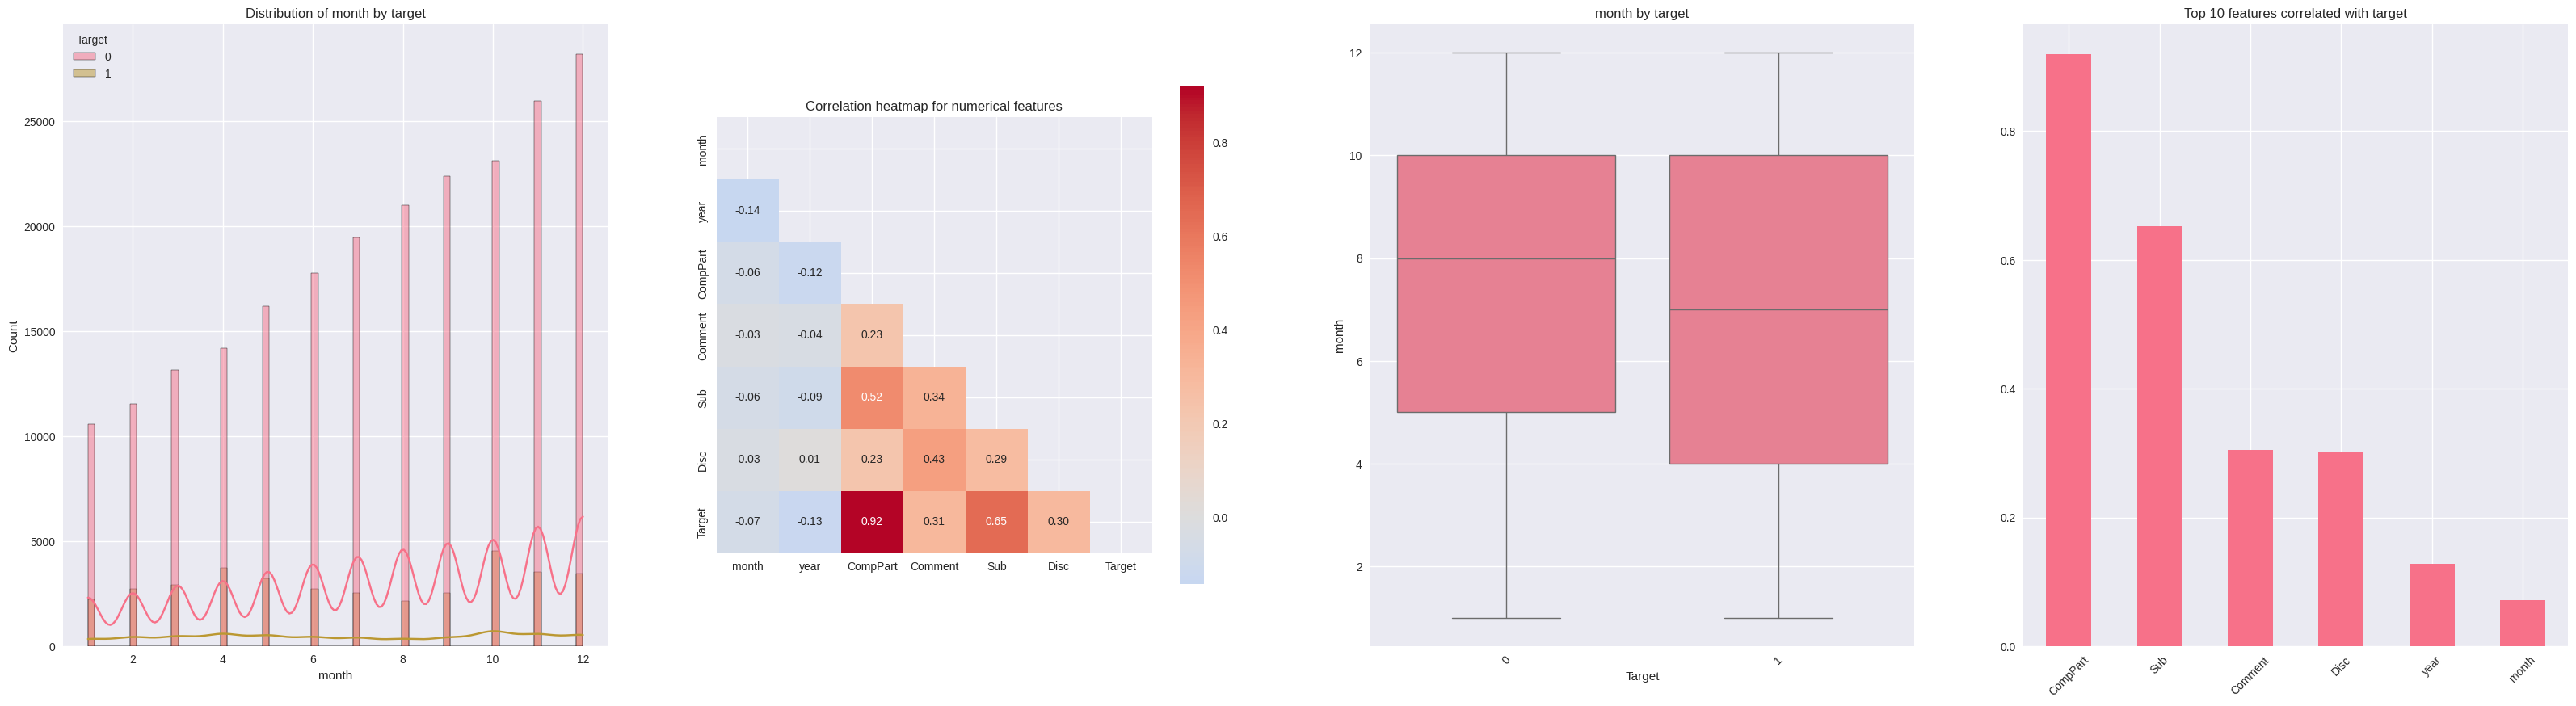

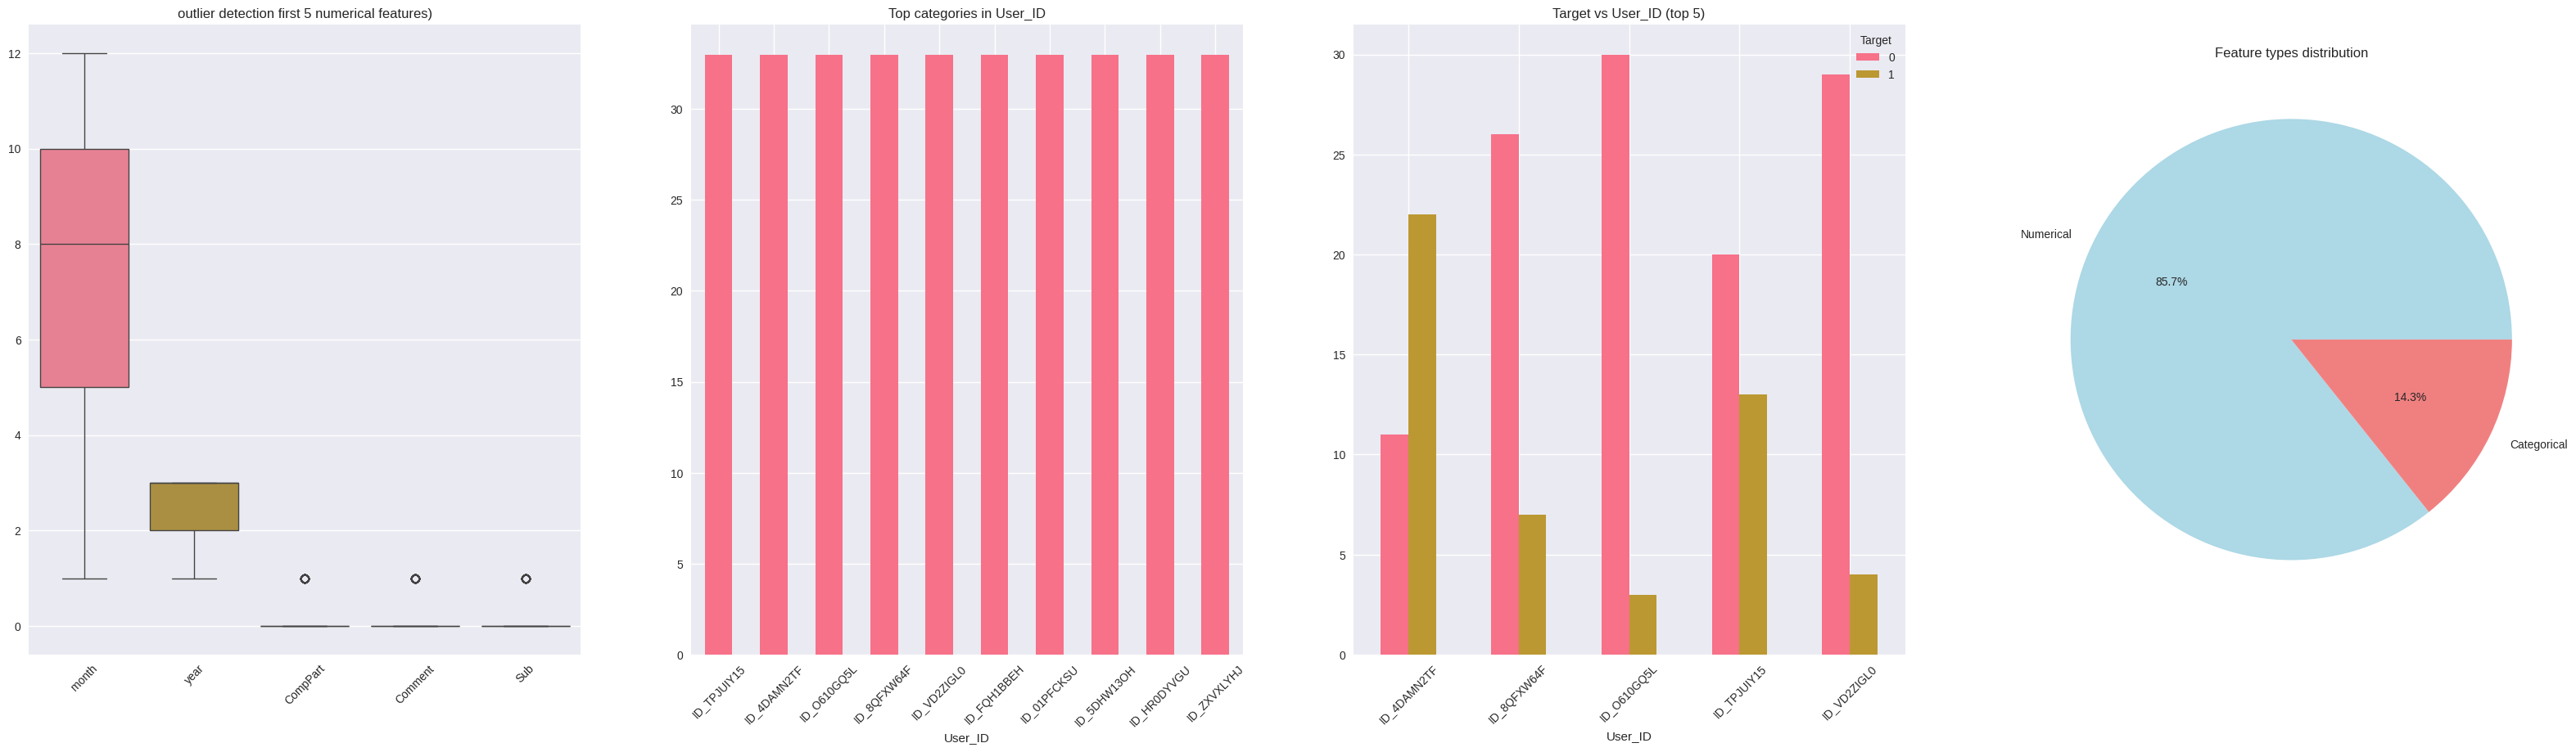

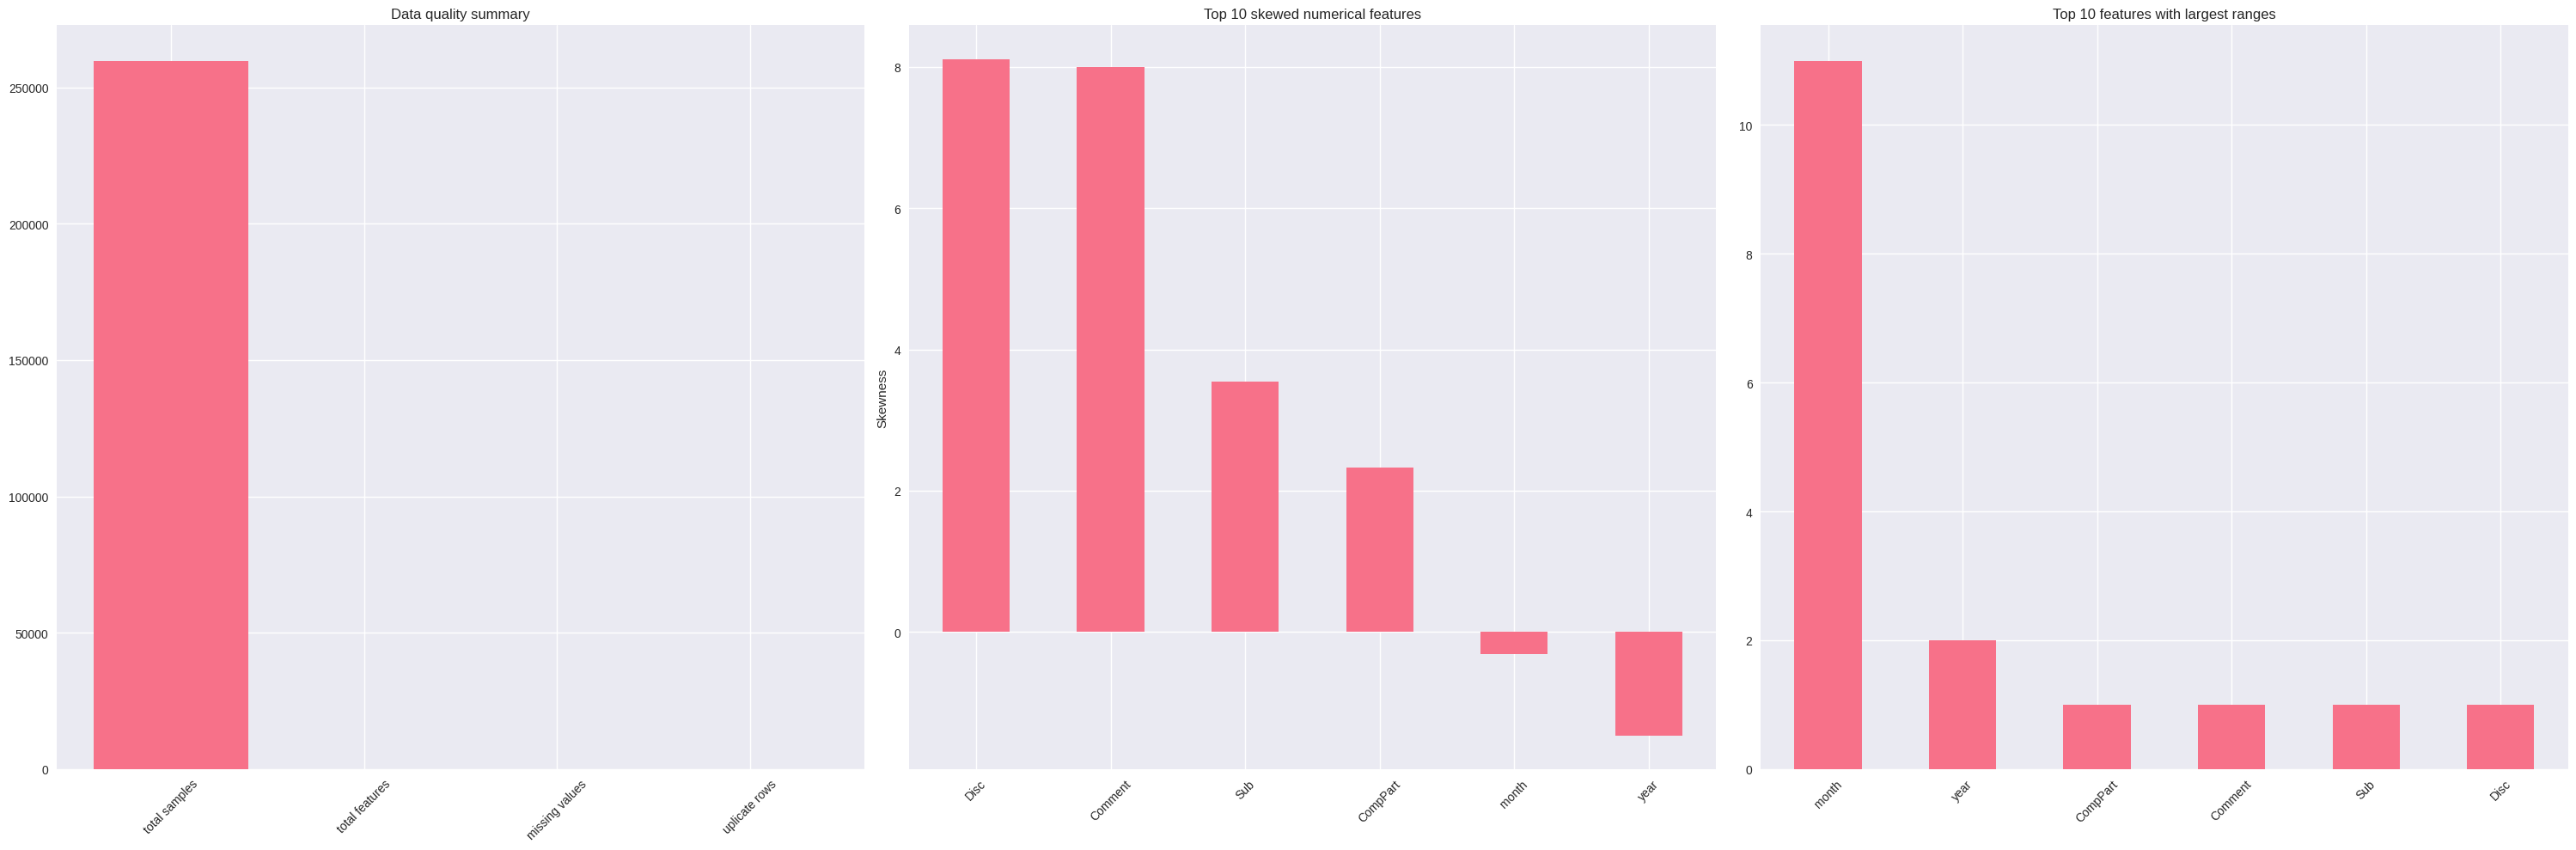

<Figure size 1500x1200 with 0 Axes>

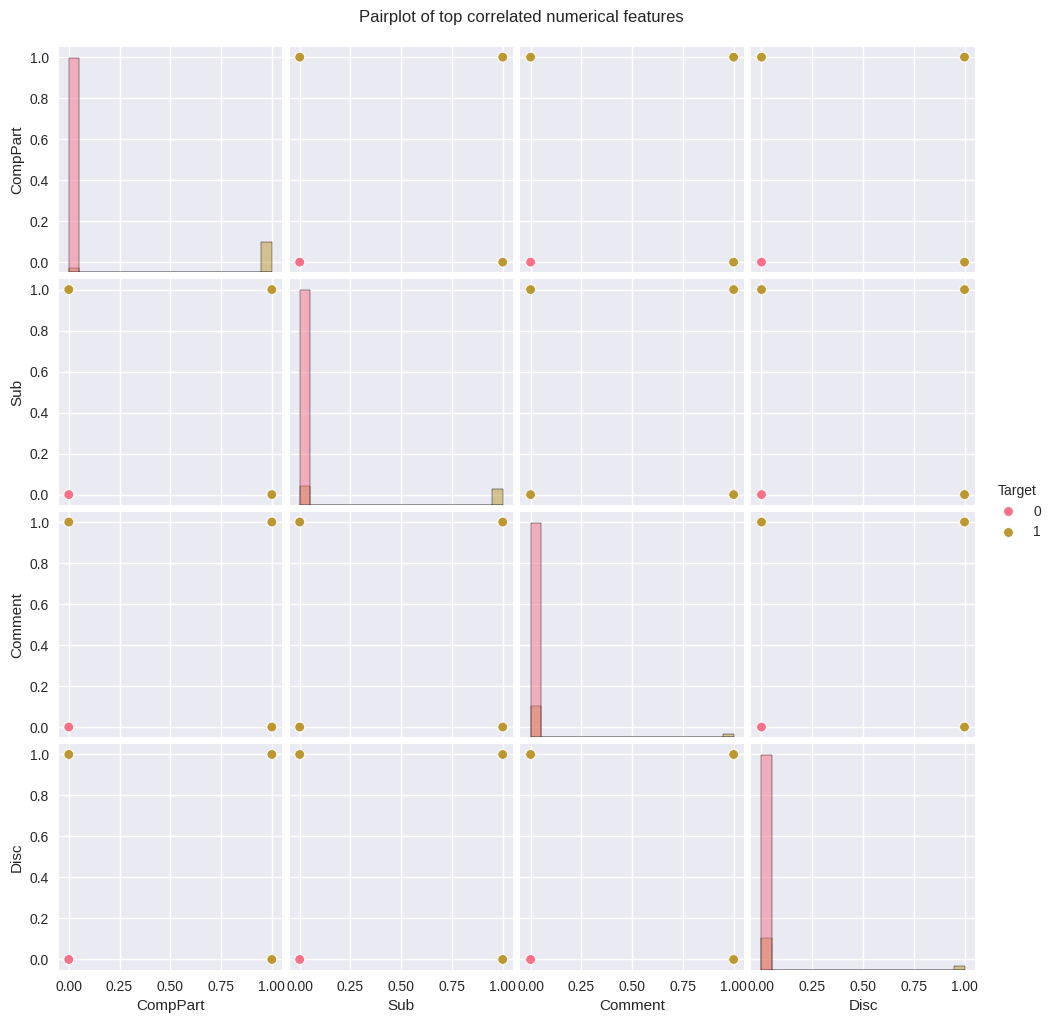

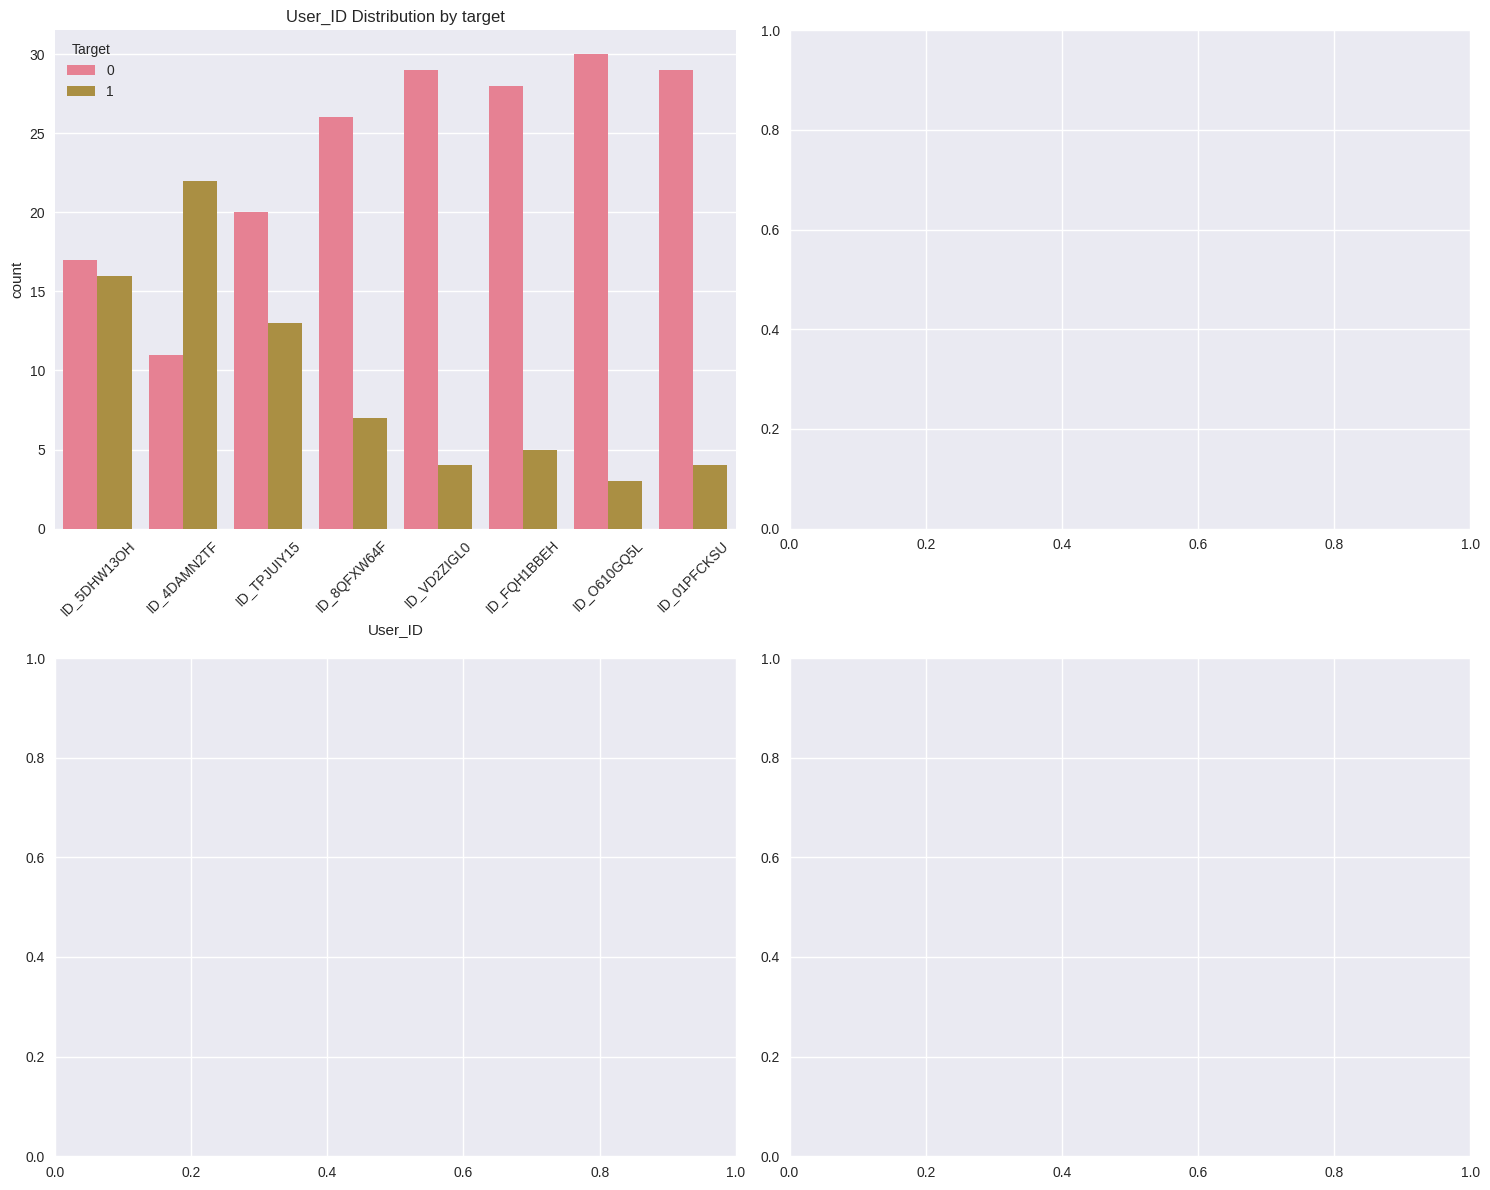

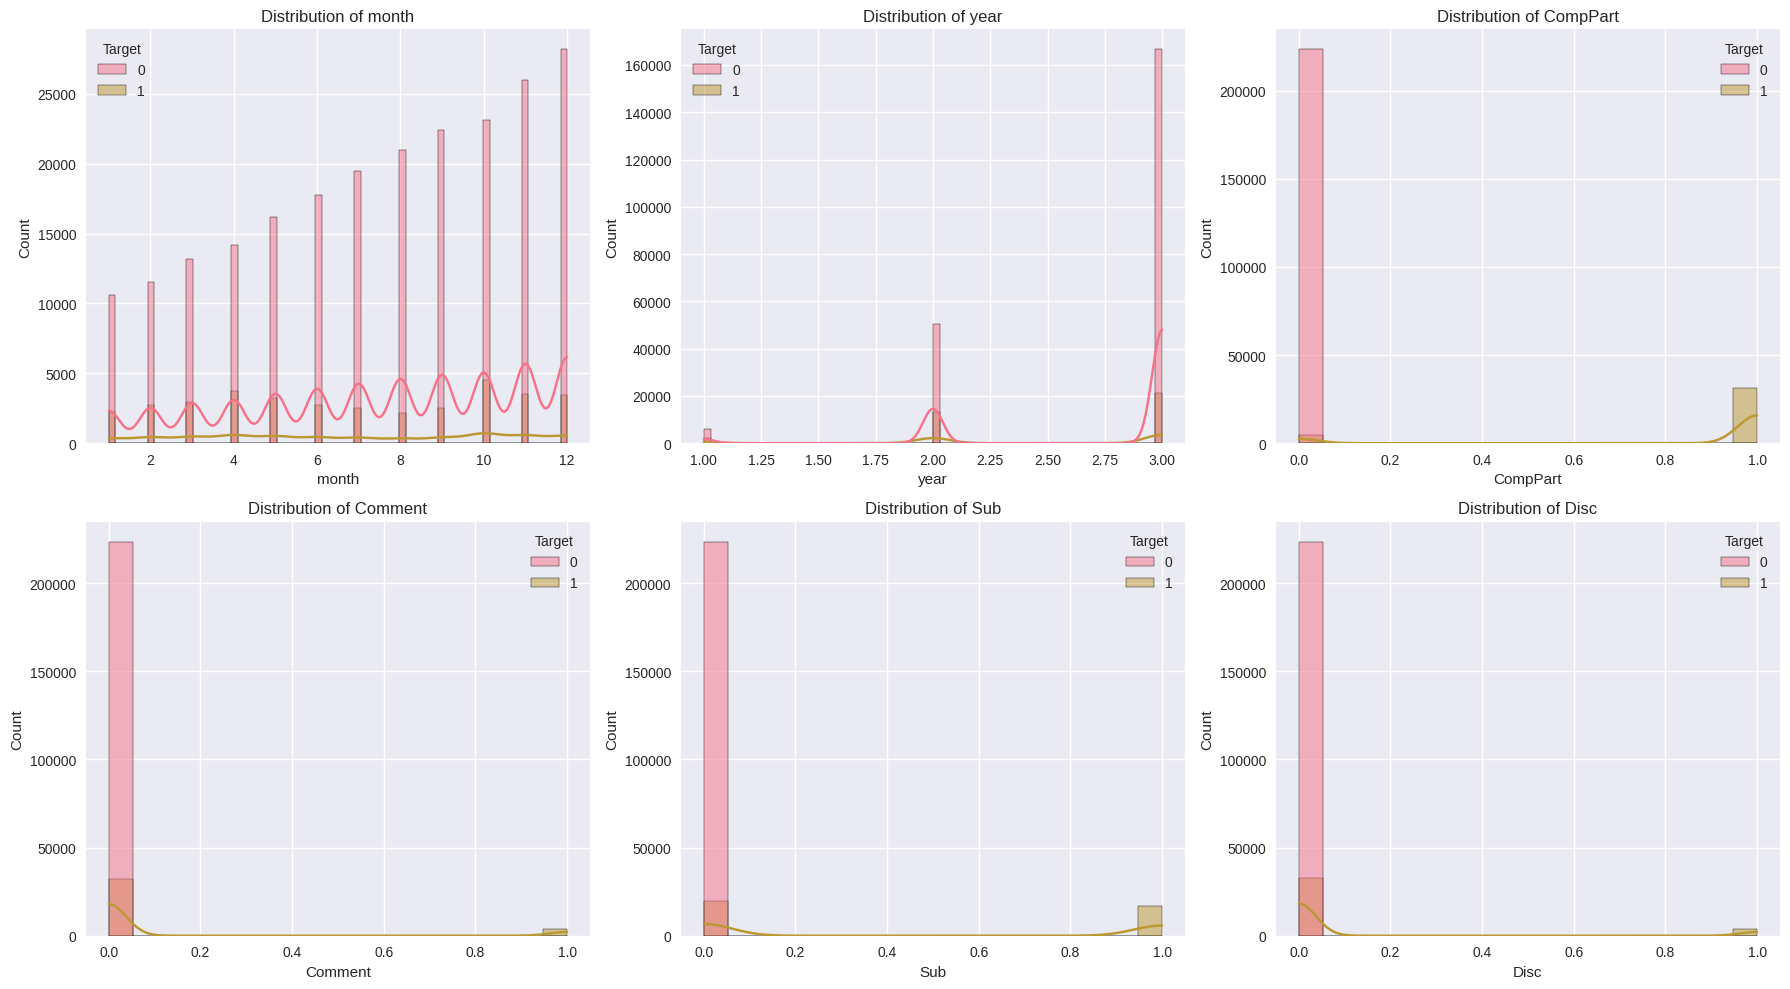


dataset shape: (259832, 8)
target variable: Target
unique target values: 2

numerical features (6):
  - month: min=1.00, max=12.00, mean=7.41, std=3.36
  - year: min=1.00, max=3.00, mean=2.69, std=0.53
  - CompPart: min=0.00, max=1.00, mean=0.12, std=0.33
  - Comment: min=0.00, max=1.00, mean=0.01, std=0.12
  - Sub: min=0.00, max=1.00, mean=0.06, std=0.25
  - Disc: min=0.00, max=1.00, mean=0.01, std=0.12

categorical features (1):
  - User_ID: 20218 unique values
missing values: 0
duplicate rows: 0


In [5]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

def create_comprehensive_visualizations(train_df, test_df, target_col='Target'):
    # subplots for dashboard
    fig = plt.figure(figsize=(40, 10))

    # target dist
    plt.subplot(1, 4, 1)
    target_counts = train_df[target_col].value_counts()
    plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Target variable distribution')

    # target count
    plt.subplot(1, 4, 2)
    sns.countplot(data=train_df, x=target_col)
    plt.title('Target value counts')
    plt.xticks(rotation=45)

    # dataset comp
    plt.subplot(1, 4, 3)
    datasets = ['Train', 'Test']
    sizes = [len(train_df), len(test_df)]
    plt.bar(datasets, sizes, color=['skyblue', 'lightcoral'])
    plt.title('Dataset sizes comparison')
    plt.ylabel('Number of samples')

    #missing values heatmap
    plt.subplot(1, 4, 4)
    missing_train = train_df.isnull().sum()
    missing_test = test_df.isnull().sum()
    missing_data = pd.DataFrame({
        'Train': missing_train,
        'Test': missing_test
    })
    sns.heatmap(missing_data.T, annot=True, cmap='Reds', cbar=False)
    plt.title('Missing values comparison')

    # separate numerical and categorical features
    numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

    #remove target from numerical features if it's there
    if target_col in numerical_features:
        numerical_features.remove(target_col)

    print(f'numerical features: {len(numerical_features)}')
    print(f'categorical features: {len(categorical_features)}')

    fig = plt.figure(figsize=(40, 10))
    # numerical features distribution
    if numerical_features:
        plt.subplot(1, 4, 1)
        # distribution of first numerical feature
        if len(numerical_features) > 0:
            sns.histplot(data=train_df, x=numerical_features[0], hue=target_col, kde=True)
            plt.title(f'Distribution of {numerical_features[0]} by target')

    # correlation heatmap for numerical features
    if len(numerical_features) > 1:
        plt.subplot(1, 4, 2)
        correlation_matrix = train_df[numerical_features + [target_col]].corr()
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={'shrink': .8})
        plt.title('Correlation heatmap for numerical features')

    # boxplot of numerical features by target
    if numerical_features:
        plt.subplot(1, 4, 3)
        if len(numerical_features) > 0:
            sns.boxplot(data=train_df, x=target_col, y=numerical_features[0])
            plt.title(f'{numerical_features[0]} by target')
            plt.xticks(rotation=45)

    # feature importance using correlation with target
    plt.subplot(1, 4, 4)
    if numerical_features:
        corr_with_target = train_df[numerical_features].corrwith(train_df[target_col]).abs().sort_values(ascending=False)
        corr_with_target.head(10).plot(kind='bar')
        plt.title('Top 10 features correlated with target')
        plt.xticks(rotation=45)

    fig = plt.figure(figsize=(40, 10))
    # outlier detection
    if numerical_features:
        plt.subplot(1, 4, 1)
        if len(numerical_features) > 0:
            sns.boxplot(data=train_df[numerical_features[:5]])  # First 5 numerical features
            plt.title('outlier detection first 5 numerical features)')
            plt.xticks(rotation=45)

    # categorical features analysis
    if categorical_features:
        plt.subplot(1, 4, 2)
        if len(categorical_features) > 0:
            top_categories = train_df[categorical_features[0]].value_counts().head(10)
            top_categories.plot(kind='bar')
            plt.title(f'Top categories in {categorical_features[0]}')
            plt.xticks(rotation=45)

    # target vs categorical feature
    if categorical_features:
        plt.subplot(1, 4, 3)
        if len(categorical_features) > 0:
            # top 5 categories to avoid overcrowding
            top_cats = train_df[categorical_features[0]].value_counts().head(5).index
            filtered_data = train_df[train_df[categorical_features[0]].isin(top_cats)]
            pd.crosstab(filtered_data[categorical_features[0]], filtered_data[target_col]).plot(kind='bar', ax=plt.gca())
            plt.title(f'Target vs {categorical_features[0]} (top 5)')
            plt.xticks(rotation=45)
            plt.legend(title=target_col)

    # feature types distribution
    plt.subplot(1, 4, 4)
    feature_types = ['Numerical', 'Categorical']
    feature_counts = [len(numerical_features), len(categorical_features)]
    plt.pie(feature_counts, labels=feature_types, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title('Feature types distribution')


    fig = plt.figure(figsize=(40, 10))
    # data quality summary
    plt.subplot(1, 4, 1)
    quality_metrics = {
        'total samples': len(train_df),
        'total features': train_df.shape[1] - 1,  # excluding target
        'missing values': train_df.isnull().sum().sum(),
        'uplicate rows': train_df.duplicated().sum()
    }
    plt.bar(range(len(quality_metrics)), list(quality_metrics.values()))
    plt.xticks(range(len(quality_metrics)), list(quality_metrics.keys()), rotation=45)
    plt.title('Data quality summary')

    # numerical features skewness
    if numerical_features:
        plt.subplot(1, 4, 2)
        skewness = train_df[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
        skewness.head(10).plot(kind='bar')
        plt.title('Top 10 skewed numerical features')
        plt.xticks(rotation=45)
        plt.ylabel('Skewness')

    # feature ranges
    if numerical_features:
        plt.subplot(1, 4, 3)
        ranges = train_df[numerical_features].max() - train_df[numerical_features].min()
        ranges.nlargest(10).plot(kind='bar')
        plt.title('Top 10 features with largest ranges')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # additional detailed visualizations
    create_detailed_analysis(train_df, numerical_features, categorical_features, target_col)

def create_detailed_analysis(train_df, numerical_features, categorical_features, target_col):
    # pairplot for top correlated numerical features
    if len(numerical_features) >= 3:
        top_corr_features = train_df[numerical_features].corrwith(train_df[target_col]).abs().nlargest(4).index.tolist()
        if len(top_corr_features) >= 3:
            plt.figure(figsize=(15, 12))
            sns.pairplot(train_df[top_corr_features + [target_col]], hue=target_col, diag_kind='hist')
            plt.suptitle('Pairplot of top correlated numerical features', y=1.02)
            plt.show()

    # detailed categorical analysis
    if categorical_features:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()

        for i, cat_feature in enumerate(categorical_features[:4]):
            if i < 4:
                # top categories
                top_cats = train_df[cat_feature].value_counts().head(8).index
                filtered_data = train_df[train_df[cat_feature].isin(top_cats)]

                # countplot
                sns.countplot(data=filtered_data, x=cat_feature, hue=target_col, ax=axes[i])
                axes[i].set_title(f'{cat_feature} Distribution by target')
                axes[i].tick_params(axis='x', rotation=45)
                axes[i].legend(title=target_col)

        plt.tight_layout()
        plt.show()

    # numerical features distribution grid
    if numerical_features:
        n_numerical = min(9, len(numerical_features))
        n_rows = int(np.ceil(n_numerical / 3))

        fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
        axes = axes.ravel() if n_rows > 1 else [axes]

        for i, feature in enumerate(numerical_features[:n_numerical]):
            sns.histplot(data=train_df, x=feature, hue=target_col, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {feature}')

        # remove empty subplots
        for i in range(n_numerical, len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

    # stat summary
    print(f'\ndataset shape: {train_df.shape}')
    print(f'target variable: {target_col}')
    print(f'unique target values: {train_df[target_col].nunique()}')

    print(f'\nnumerical features ({len(numerical_features)}):')
    for feature in numerical_features[:10]:  # Show first 10
        print(f'  - {feature}: min={train_df[feature].min():.2f}, max={train_df[feature].max():.2f}, '
              f'mean={train_df[feature].mean():.2f}, std={train_df[feature].std():.2f}')

    if len(numerical_features) > 10:
        print(f'  ... and {len(numerical_features) - 10} more numerical features')

    print(f'\ncategorical features ({len(categorical_features)}):')
    for feature in categorical_features[:5]:  # Show first 5
        unique_vals = train_df[feature].nunique()
        print(f'  - {feature}: {unique_vals} unique values')

    if len(categorical_features) > 5:
        print(f'  ... and {len(categorical_features) - 5} more categorical features')

    # data quality report
    print(f'missing values: {train_df.isnull().sum().sum()}')
    print(f'duplicate rows: {train_df.duplicated().sum()}')

# run
if __name__ == '__main__':
    create_comprehensive_visualizations(train_df, test_df, target_col='Target')

Motivation for stratify=y: Since this is a classification problem, we want to ensure our validation set has the same class balance (ratio of active to inactive users) as our training set. This gives a more reliable estimate of model performance.

Key observations from data:
- Severe class imbalance
Class 0 (inactive): 86.0% (223,526 samples)
Class 1 (active): 14.0% (36,306 samples)

This is a highly imbalanced dataset, which means accuracy would be a very bad metric (a model that always predicts '0' would get 86% accuracy but be useless). We should use F1-score or ROC-AUC as our main evaluation metric.

- Feature Types
Categorical: User_ID (object type);
Numerical: month, year, CompPart, Comment, Sub, Disc

- no missing values

In [7]:
X_train_clean = X_train.copy()
X_val_clean = X_val.copy()

# drop user_id for initial model it's not a predictive feature
print('dropping user_id')
X_train_clean = X_train_clean.drop('User_ID', axis=1)
X_val_clean = X_val_clean.drop('User_ID', axis=1)

print(f'after drop User_ID:')
print(f'X_train_clean shape: {X_train_clean.shape}')
print(f'X_val_clean shape: {X_val_clean.shape}')

# num features
print('\nnum features')
print(X_train_clean.describe())

# correlation matrix
correlation_matrix = X_train_clean.corr()

print('correlation matrix for numerical features')
print(correlation_matrix.round(3))

# correlations with target
X_train_with_target = X_train_clean.copy()
X_train_with_target['Target'] = y_train.values
target_correlations = X_train_with_target.corr()['Target'].drop('Target')
print('\ncorrelations with target var:')
for feature, corr in target_correlations.items():
    strength = 'strong' if abs(corr) > 0.5 else 'moderate' if abs(corr) > 0.3 else 'weak' if abs(corr) > 0.1 else 'negligible'
    print(f'{feature}: {corr:.3f} ({strength})')

# highly correlated feature pairs
high_corr_pairs = []
features = correlation_matrix.columns

for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((features[i], features[j], corr_value))

if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f'{feat1} vs {feat2}: {corr:.3f}')

# feature relationships summary
for feature in correlation_matrix.columns:
    strongest_corr = correlation_matrix[feature].drop(feature).abs().max()
    strongest_with = correlation_matrix[feature].drop(feature).abs().idxmax()
    strongest_value = correlation_matrix.loc[feature, strongest_with]
    strength = 'strong' if abs(strongest_value) > 0.5 else 'moderate' if abs(strongest_value) > 0.3 else 'weak' if abs(strongest_value) > 0.1 else 'negligible'
    print(f'{feature}: strongest correlation with {strongest_with} (r = {strongest_value:.3f}, {strength})')

print(f'inactive: {((y_train == 0).sum() / len(y_train) * 100):.1f}%')
print(f'active: {((y_train == 1).sum() / len(y_train) * 100):.1f}%')

dropping user_id
after drop User_ID:
X_train_clean shape: (207865, 6)
X_val_clean shape: (51967, 6)

num features
               month           year       CompPart        Comment  \
count  207865.000000  207865.000000  207865.000000  207865.000000   
mean        7.409400       2.690607       0.120684       0.014952   
std         3.355602       0.527185       0.325761       0.121361   
min         1.000000       1.000000       0.000000       0.000000   
25%         5.000000       2.000000       0.000000       0.000000   
50%         8.000000       3.000000       0.000000       0.000000   
75%        10.000000       3.000000       0.000000       0.000000   
max        12.000000       3.000000       1.000000       1.000000   

                 Sub           Disc  
count  207865.000000  207865.000000  
mean        0.064893       0.014538  
std         0.246338       0.119695  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000 

We drop user id because they are unique identifiers, not meaningful features for prediction. Including them would cause overfitting.

F1 gives good balance between precision and recall and roc auc measures how well the model distinguishes between classes.

Accuracy is misleading.
Correlation heatmap shows correlation between features.

What we found:
CompPart: 0.919 correlation with Target it is extremely strong predictor

Sub: 0.654 correlation with Target strong predictor

Comment and Disc (Discussion): 0.30 correlation moderate predicors.

This means user activity features predict future activity very well.

month and year: very weak correlations (-0.07 to -0.13)

CompPart and Sub have the strongest correlation (0.520) makes sense since submitting requires participation

Comment and Disc: very rare (only 1.5% of users)

CompPart: 12.1% of users participate

Sub: 6.5% of users make submissions

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

# init rf with class weights to handle imbalance
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)

# train
model.fit(X_train_clean, y_train)

# pred
y_pred = model.predict(X_val_clean)

# eval
print('f1:', f1_score(y_val, y_pred))
print('\nclassification report:')
print(classification_report(y_val, y_pred))

f1: 1.0

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44706
           1       1.00      1.00      1.00      7261

    accuracy                           1.00     51967
   macro avg       1.00      1.00      1.00     51967
weighted avg       1.00      1.00      1.00     51967



F1 score of 1 is not normal. We have data leakage. The features in train.csv directly reveal the target variable. We have to try raw features.

We go back to raw data to build meaningful features that do not leak.

In [9]:
import pandas as pd

# load raw data
users = pd.read_csv('Users.csv')
competitions = pd.read_csv('Competitions.csv')
comp_participation = pd.read_csv('CompetitionPartipation.csv')
submissions = pd.read_csv('Submissions.csv')
discussions = pd.read_csv('Discussions.csv')
comments = pd.read_csv('Comments.csv')

print(f'users: {users.shape}')
print(f'competitions: {competitions.shape}')
print(f'comp_participation: {comp_participation.shape}')
print(f'submissions: {submissions.shape}')
print(f'discussions: {discussions.shape}')
print(f'comments: {comments.shape}')


# structure
print('\nuser head')
print(users.head())
print('\nusers cols:')
print(users.columns.tolist())

users: (22407, 8)
competitions: (154, 17)
comp_participation: (48565, 7)
submissions: (375763, 6)
discussions: (6211, 6)
comments: (11751, 4)

user head
        UserID  FeatureX  Country  FeatureY   Points  UserDate Year  \
0  ID_N5LTBAPU         0  ID_DMRM         1  group 3              2   
1  ID_CLSFQB0S         0   ID_Q02         3  group 3              1   
2  ID_RE6T58Y4         0   ID_Q02         0  group 3              2   
3  ID_XJQQRJV3         0  ID_Z8BI         0  group 3              2   
4  ID_1JHU6A8S         0   ID_Q02         3  group 3              2   

   UserDate Month  UserDate Day_of_week  
0               4                     4  
1               5                     4  
2              12                     3  
3               9                     2  
4              10                     1  

users cols:
['UserID', 'FeatureX', 'Country', 'FeatureY', 'Points', 'UserDate Year', 'UserDate Month', 'UserDate Day_of_week']


In [10]:
#model with static feat
target_data = train_df[['User_ID', 'Target']].copy()

# most recent prediction for each user
user_targets = target_data.groupby('User_ID')['Target'].max().reset_index()
print(f'Unique users with targets: {len(user_targets)}')

# feat eng from user table
# create feature with how long user is on platform
# reg date from user table
users_static = users.copy()

# user tenure in months
current_year = train_df['year'].max()
current_month = train_df['month'].max()
users_static['user_tenure_months'] = (
    (current_year - users_static['UserDate Year']) * 12 +
    (current_month - users_static['UserDate Month'])
)
# tenure is not negative
users_static['user_tenure_months'] = users_static['user_tenure_months'].clip(lower=0)

# select static features
static_features = ['UserID', 'Country', 'Points', 'user_tenure_months', 'FeatureX', 'FeatureY']

print('static features:')
for feature in static_features:
    if feature in users_static.columns:
        print(f'{feature}')


# feature dataframe
X_static = users_static[static_features].copy()

# merge user features with target variable
df_model = pd.merge(X_static, user_targets, left_on='UserID', right_on='User_ID', how='inner')
df_model = df_model.drop('User_ID', axis=1)

print(f'final dataset shape: {df_model.shape}')
print(f'class dist in final dataset:')
print(df_model['Target'].value_counts(normalize=True).round(3))

Unique users with targets: 20218
static features:
UserID
Country
Points
user_tenure_months
FeatureX
FeatureY
final dataset shape: (20218, 7)
class dist in final dataset:
Target
1    0.751
0    0.249
Name: proportion, dtype: float64


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

# categorical columns
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()

# remove target from numerical cols
numerical_cols = [col for col in numerical_cols if col != 'Target']

print(f'categorical columns: {categorical_cols}')
print(f'numerical columns: {numerical_cols}')

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

# prepare features and target
X = df_model.drop('Target', axis=1)
y = df_model['Target']

print(f'features shape: {X.shape}')
print(f'target shape: {y.shape}')

X_train_static, X_val_static, y_train_static, y_val_static = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

print(f'\ntrain set: {X_train_static.shape}')
print(f'val set: {X_val_static.shape}')
print(f'train class distribution: {y_train_static.value_counts(normalize=True).round(3).to_dict()}')
print(f'val class distribution: {y_val_static.value_counts(normalize=True).round(3).to_dict()}')

print('\ntraining rf model')

# pipeline with preprocessing and model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42,
        max_depth=10
    ))
])

# train
model_pipeline.fit(X_train_static, y_train_static)

# pred
y_pred = model_pipeline.predict(X_val_static)
y_pred_proba = model_pipeline.predict_proba(X_val_static)[:, 1]

# eval
f1 = f1_score(y_val_static, y_pred)
roc_auc = roc_auc_score(y_val_static, y_pred_proba)


print(f'f1: {f1:.4f}')
print(f'roc auc: {roc_auc:.4f}')
print('\nclassification Report:')
print(classification_report(y_val_static, y_pred))

# Get feature names after one-hot encoding
feature_names = numerical_cols.copy()
if 'preprocessor' in model_pipeline.named_steps:
    ohe = model_pipeline.named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
    feature_names.extend(ohe_feature_names)

categorical columns: ['UserID', 'Country', 'Points']
numerical columns: ['user_tenure_months', 'FeatureX', 'FeatureY']
features shape: (20218, 6)
target shape: (20218,)

train set: (16174, 6)
val set: (4044, 6)
train class distribution: {1: 0.751, 0: 0.249}
val class distribution: {1: 0.751, 0: 0.249}

training rf model
f1: 0.7081
roc auc: 0.7722

classification Report:
              precision    recall  f1-score   support

           0       0.40      0.86      0.55      1005
           1       0.93      0.57      0.71      3039

    accuracy                           0.64      4044
   macro avg       0.66      0.72      0.63      4044
weighted avg       0.80      0.64      0.67      4044



In [12]:
df_model_fixed = df_model.drop('UserID', axis=1)

# encode cat labels
label_encoders = {}
for col in ['Country', 'Points']:
    le = LabelEncoder()
    df_model_fixed[col] = le.fit_transform(df_model_fixed[col].astype(str))
    label_encoders[col] = le

# final feature set
X_final = df_model_fixed.drop('Target', axis=1)
y_final = df_model_fixed['Target']

# split again with preproc data
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

# train final model
final_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    max_depth=10
)

final_model.fit(X_train_final, y_train_final)

# final pred
y_pred_final = final_model.predict(X_val_final)
y_pred_proba_final = final_model.predict_proba(X_val_final)[:, 1]

# final eval
f1_final = f1_score(y_val_final, y_pred_final)
roc_auc_final = roc_auc_score(y_val_final, y_pred_proba_final)

print(f'f1: {f1_final:.4f}')
print(f'roc auc: {roc_auc_final:.4f}')
print('\nclassification report:')
print(classification_report(y_val_final, y_pred_final))


f1: 0.7705
roc auc: 0.8389

classification report:
              precision    recall  f1-score   support

           0       0.46      0.91      0.61      1005
           1       0.96      0.65      0.77      3039

    accuracy                           0.71      4044
   macro avg       0.71      0.78      0.69      4044
weighted avg       0.83      0.71      0.73      4044



In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

df_optimized = df_model_fixed.copy()

df_optimized['tenure_group'] = pd.cut(df_optimized['user_tenure_months'],
                                     bins=[0, 1, 3, 6, 12, 24, 100],
                                     labels=['0-1', '1-3', '3-6', '6-12', '12-24', '24+'])

# fix point grouping
points_value_counts = df_optimized['Points'].value_counts().sort_index()

# bins for points based on actual value distribution
points_bins = [-1, 0, 1, 2, 3, float('inf')]
points_labels = ['0', '1', '2', '3', '4+']
df_optimized['points_group'] = pd.cut(df_optimized['Points'], bins=points_bins, labels=points_labels)

# math transofrmations
df_optimized['log_tenure'] = np.log1p(df_optimized['user_tenure_months'])
df_optimized['sqrt_points'] = np.sqrt(df_optimized['Points'] + 1)  # +1 to avoid sqrt(0)
df_optimized['points_per_month'] = df_optimized['Points'] / (df_optimized['user_tenure_months'] + 1)

# interaction feats
df_optimized['high_points_long_tenure'] = ((df_optimized['Points'] > df_optimized['Points'].median()) &
                                          (df_optimized['user_tenure_months'] > df_optimized['user_tenure_months'].median())).astype(int)

df_optimized['new_user_high_points'] = ((df_optimized['user_tenure_months'] < 3) &
                                       (df_optimized['Points'] > df_optimized['Points'].median())).astype(int)

# polynomial features
df_optimized['tenure_squared'] = df_optimized['user_tenure_months'] ** 2
df_optimized['points_squared'] = (df_optimized['Points'] + 1) ** 2  # +1 to handle 0 points

# ratio features
df_optimized['feature_ratio'] = df_optimized['FeatureY'] / (df_optimized['FeatureX'] + 1)

#additional features
df_optimized['activity_score'] = df_optimized['Points'] * df_optimized['user_tenure_months']
df_optimized['is_new_user'] = (df_optimized['user_tenure_months'] <= 1).astype(int)
df_optimized['is_established_user'] = (df_optimized['user_tenure_months'] >= 6).astype(int)

print(f'original features: {df_model_fixed.columns.tolist()}')
print(f'new features created: {[col for col in df_optimized.columns if col not in df_model_fixed.columns]}')
print(f'total features after engineering: {len(df_optimized.columns) - 1}')  # minus target

# prepare features and target
X_opt = df_optimized.drop('Target', axis=1)
y_opt = df_optimized['Target']

# encode all categorical variables
label_encoders = {}
for col in X_opt.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_opt[col] = le.fit_transform(X_opt[col].astype(str))
    label_encoders[col] = le
    print(f'encoded: {col}')

print(f'final feature matrix shape: {X_opt.shape}')

# split with stratification
X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
    X_opt, y_opt, test_size=0.2, random_state=42, stratify=y_opt
)

print(f'train set: {X_train_opt.shape}, val set: {X_val_opt.shape}')

# rf to select most important features
selector = RandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_train_opt, y_train_opt)

# select features with importance > mean importance
sfm = SelectFromModel(selector, threshold='mean', prefit=True)
X_train_selected = sfm.transform(X_train_opt)
X_val_selected = sfm.transform(X_val_opt)

selected_features = X_opt.columns[sfm.get_support()]

# param grids for different algorithms
param_grids = {}

# rf
param_grids['rf'] = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# gb
param_grids['gb'] = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

# xgboost
param_grids['xgb'] = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9]
}

# train and tune each model
best_models = {}
best_scores = {}

for model_name, param_grid in param_grids.items():
    print(f'\ntuning {model_name.upper()}')

    if model_name == 'rf':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'gb':
        model = GradientBoostingClassifier(random_state=42)
    elif model_name == 'xgb':
        model = XGBClassifier(random_state=42, eval_metric='logloss')

    grid_search = GridSearchCV(
        model, param_grid,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_selected, y_train_opt)

    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_

    print(f'best {model_name} params: {grid_search.best_params_}')
    print(f'best {model_name} cv f1: {grid_search.best_score_:.4f}')


# super ensemble with the best tuned models
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_models['rf']),
        ('gb', best_models['gb']),
        ('xgb', best_models['xgb'])
    ],
    voting='soft',
    weights=[best_scores['rf'], best_scores['gb'], best_scores['xgb']]  # Weight by performance
)

print('training ensemble model')
ensemble.fit(X_train_selected, y_train_opt)

models_to_evaluate = {
    'Random Forest': best_models['rf'],
    'Gradient Boosting': best_models['gb'],
    'XGBoost': best_models['xgb'],
    'Ensemble': ensemble
}

results = {}

for name, model in models_to_evaluate.items():
    # pred
    y_pred = model.predict(X_val_selected)
    y_pred_proba = model.predict_proba(X_val_selected)[:, 1]

    # metrics
    f1 = f1_score(y_val_opt, y_pred)
    roc_auc = roc_auc_score(y_val_opt, y_pred_proba)
    accuracy = (y_pred == y_val_opt).mean()

    results[name] = {
        'F1': f1,
        'roc_ajc': roc_auc,
        'acccuracy': accuracy
    }

    print(f'\n{name.upper()} results:')
    print(f'f1: {f1:.4f}')
    print(f'roc auc: {roc_auc:.4f}')
    print(f'accuracy: {accuracy:.4f}')

    # class report
    if f1 == max([results[m]['F1'] for m in results]):
        print('\nclassification report for best model):')
        print(classification_report(y_val_opt, y_pred))
        print('confusion matrix:')
        print(confusion_matrix(y_val_opt, y_pred))


baseline_f1 = 0.7705
best_f1 = max([results[m]['F1'] for m in results])

print(f'basic f1 score: {baseline_f1:.4f}')
print(f'best optimized f1 score: {best_f1:.4f}')
print(f'improvement: +{(best_f1 - baseline_f1):.4f} ({(best_f1 - baseline_f1)/baseline_f1*100:.1f}%)')

# Determine the best overall model
best_overall_model_name = max(results.keys(), key=lambda x: results[x]['F1'])
best_overall_model = models_to_evaluate[best_overall_model_name]

print(f'\nbest overal model: {best_overall_model_name}')
print(f"best model f1: {results[best_overall_model_name]['F1']:.4f}")

# stacking
from sklearn.linear_model import LogisticRegression

# meta-features from base model predictions
meta_features_train = np.column_stack([
    best_models['rf'].predict_proba(X_train_selected)[:, 1],
    best_models['gb'].predict_proba(X_train_selected)[:, 1],
    best_models['xgb'].predict_proba(X_train_selected)[:, 1]
])

meta_features_val = np.column_stack([
    best_models['rf'].predict_proba(X_val_selected)[:, 1],
    best_models['gb'].predict_proba(X_val_selected)[:, 1],
    best_models['xgb'].predict_proba(X_val_selected)[:, 1]
])

# train meta-learner
meta_learner = LogisticRegression(random_state=42)
meta_learner.fit(meta_features_train, y_train_opt)

# stacking preds
stacking_pred_proba = meta_learner.predict_proba(meta_features_val)[:, 1]
stacking_pred = (stacking_pred_proba > 0.5).astype(int)

stacking_f1 = f1_score(y_val_opt, stacking_pred)
stacking_auc = roc_auc_score(y_val_opt, stacking_pred_proba)

print(f'stacking ensemble results:')
print(f'f1 score: {stacking_f1:.4f}')
print(f'roc auc: {stacking_auc:.4f}')

# best results if stacking is better
if stacking_f1 > best_f1:
    best_f1 = stacking_f1
    best_overall_model_name = 'stacking ensemble'

print(f'\nfinal best model f1: {best_f1:.4f}')
print(f'total improvement: +{(best_f1 - baseline_f1):.4f} ({(best_f1 - baseline_f1)/baseline_f1*100:.1f}%)')

original features: ['Country', 'Points', 'user_tenure_months', 'FeatureX', 'FeatureY', 'Target']
new features created: ['tenure_group', 'points_group', 'log_tenure', 'sqrt_points', 'points_per_month', 'high_points_long_tenure', 'new_user_high_points', 'tenure_squared', 'points_squared', 'feature_ratio', 'activity_score', 'is_new_user', 'is_established_user']
total features after engineering: 18
encoded: tenure_group
encoded: points_group
final feature matrix shape: (20218, 18)
train set: (16174, 18), val set: (4044, 18)

tuning RF
Fitting 3 folds for each of 12 candidates, totalling 36 fits
best rf params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
best rf cv f1: 0.7988

tuning GB
Fitting 3 folds for each of 8 candidates, totalling 24 fits
best gb params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
best gb cv f1: 0.8610

tuning XGB
Fitting 3 folds for each of 16 candidates, totalling 48 fits
best xgb params: {'learning_r